## Inisiasi

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st
import math as mth

## Data dan Optimalisasi Data

Terdapat 3 dataset yang akan digunakan
1. Data Hipotesis, Data yang digunakan untuk mencari prioritas dari hipotesis yang akan diuji menggunakan framework atau kerangka kerja ICE dan RICE.
2. Data Pemesanan, Data yang berisi pesanan yang dilakukan pengguna berdasarkan grup tertentu. Berisi data pendapatan kotor (Revenue), tanggal dibuatnya pesanan, id pengguna yang membeli, dan id pembelian.
3. Data Kunjungan, Data yang berisi kunjungan pengguna kepada situs toko online berdasarkan grup tertentu.

In [7]:
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', 
                         delimiter=';')

orders = pd.read_csv('datasets/orders_us.csv', 
                     parse_dates=['date'],
                     dtype = {'group' : 'category'})

visits = pd.read_csv('datasets/visits_us.csv',
                    parse_dates=['date'],
                    dtype = {'group' : 'category'})

### Hipotesis

In [8]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [9]:
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


Data sudah optimal.

### Pemesanan

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


In [12]:
orders.duplicated().sum()

0

Terdapat 1197 data, tidak terdapat data yang hilang, dan tidak terdapat duplikat pada `orders`

### Kunjungan

In [13]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [15]:
visits.duplicated().sum()

0

tidak terdapat duplikat pada data.

## Memprioritaskan Hipotesis

Disini akan dibandingkan perbedaan antara framework ICE dengan RICE.

In [16]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### ICE

In [17]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / (hypotheses['Effort'])
hypotheses.sort_values('ICE', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Jika dilihat menggunakan framework ICE, maka hipotesis nomer 8 layak diprioritaskan dari hipotesis lainnya.

### RICE

In [18]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / (hypotheses['Effort'])
hypotheses.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Keberadaan parameter `Reach` yang menunjukkan seberapa besar jangkauan dari hipotesis tersebut agar dapat mempengaruhi lebih banyak pengguna. Hal ini cukup signifikan, karena berapapun besar `impact` yang dapat diberikan kepada pengguna, jika kita tidak mengetahui seberapa banyak pengguna yang akan terpengaruh maka akan sia-sia. Disini parameter `Reach` membuat hipotesis nomor 7 menjadi lebih diprioritaskan dibandingkan dengan hipotesis nomor 8.

## Analisis A/B Testing

### Pendapatan

In [19]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [20]:
revenue_cumulative_A = orders[orders['group'] == 'A'].groupby('date').agg({'revenue' : 'sum'}).cumsum()
revenue_cumulative_B = orders[orders['group'] == 'B'].groupby('date').agg({'revenue' : 'sum'}).cumsum()

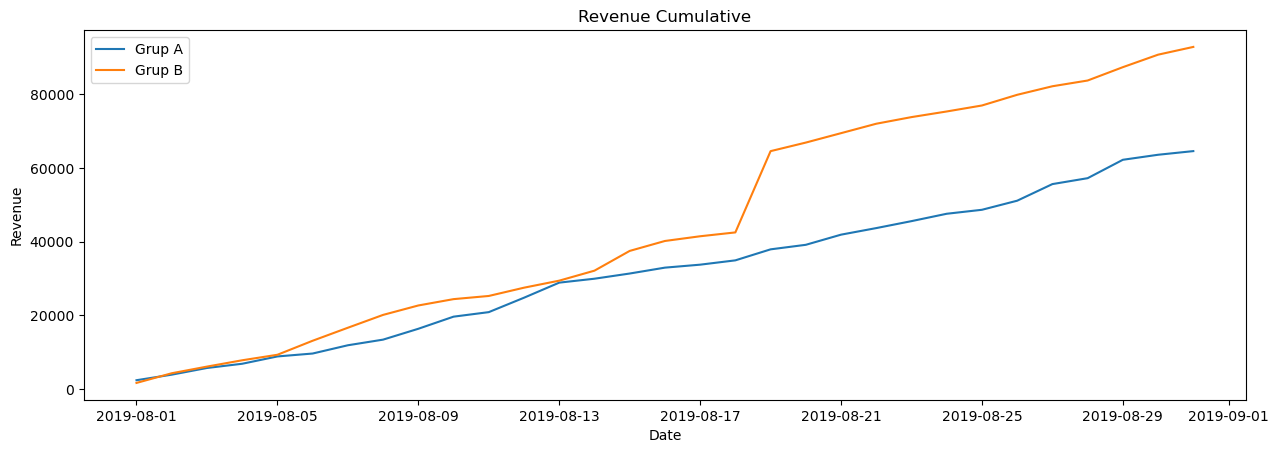

In [21]:
plt.figure().set_figwidth(15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Cumulative')
plt.plot(revenue_cumulative_A, label='Grup A')
plt.plot(revenue_cumulative_B, label='Grup B')
plt.legend()
plt.show()

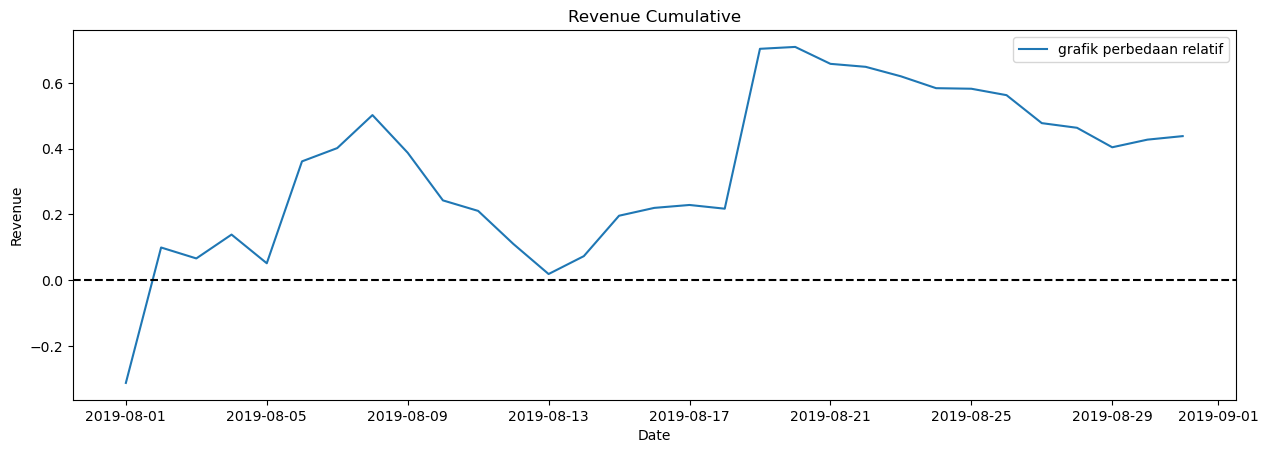

In [22]:
plt.figure().set_figwidth(15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Cumulative')
plt.plot(revenue_cumulative_B / revenue_cumulative_A - 1, label='grafik perbedaan relatif')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

Pendapatan darri grup B lebih menguntungkan daripada grup A. Grafik perbedaan relatif juga mendukung hal ini dengan perbedaan yang cukup tinggi antara pendapatan grup B dengan grup A.


### Jumlah Pesanan

Mari kita lihat jumlah pesanan rata-rata per pelanggan

In [23]:
orders_per_visitor_A = orders[orders['group'] == 'A'].groupby(['visitorId','date'], as_index=False).agg({'transactionId': pd.Series.nunique  ,'revenue' : 'sum', })
orders_per_visitor_A.columns = ['visitorId','date','order_count','revenue']
orders_per_visitor_A.head()


,visitorId,date,order_count,revenue
0,8300375,2019-08-07,1,30.5
1,11685486,2019-08-23,1,100.4
2,54447517,2019-08-08,1,5.0
3,66685450,2019-08-13,1,125.9
4,78758296,2019-08-15,1,20.1


In [24]:
orders_per_visitor_B = orders[orders['group'] == 'B'].groupby(['visitorId','date'], as_index=False).agg({'transactionId': pd.Series.nunique  ,'revenue' : 'sum', })
orders_per_visitor_B.columns = ['visitorId','date','order_count','revenue']
orders_per_visitor_B.head()

,visitorId,date,order_count,revenue
0,5114589,2019-08-16,1,10.8
1,6958315,2019-08-04,1,25.9
2,8300375,2019-08-01,1,165.7
3,39475350,2019-08-08,1,65.4
4,47206413,2019-08-10,1,15.2


In [25]:
print(f"Jumlah rata-rata pesanan grup A: {orders_per_visitor_A['order_count'].mean()}")
print(f"Jumlah rata-rata pesanan grup B: {orders_per_visitor_B['order_count'].mean()}")

Jumlah rata-rata pesanan grup A: 1.0257826887661141
Jumlah rata-rata pesanan grup B: 1.019108280254777


In [26]:
print(f"Jumlah total pesanan grup A: {orders_per_visitor_A['order_count'].sum()}")
print(f"Jumlah total pesanan grup B: {orders_per_visitor_B['order_count'].sum()}")

Jumlah total pesanan grup A: 557
Jumlah total pesanan grup B: 640


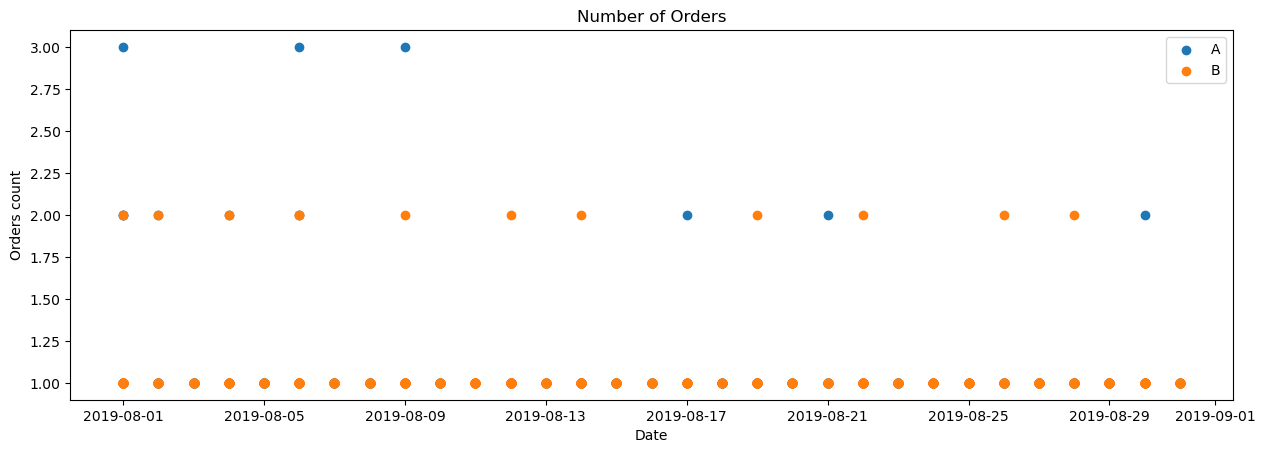

In [27]:
plt.figure().set_figwidth(15)
plt.ylabel('Orders count')
plt.xlabel('Date')
plt.title('Number of Orders')
plt.scatter(orders_per_visitor_A['date'], orders_per_visitor_A['order_count'], label='A') 
plt.scatter(orders_per_visitor_B['date'], orders_per_visitor_B['order_count'], label='B') 
plt.legend()
plt.show()

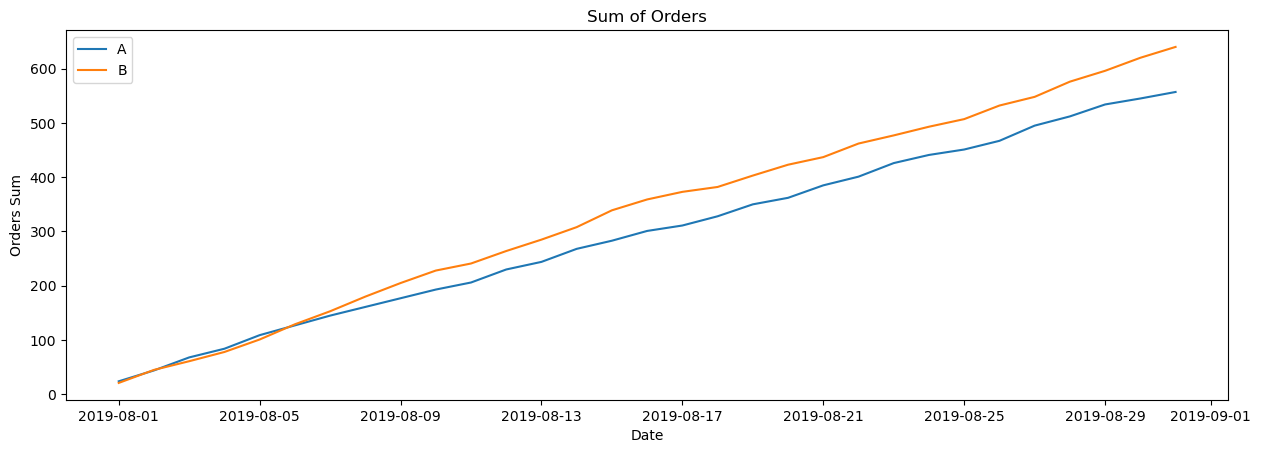

In [28]:
Sum_Order_A = orders_per_visitor_A.groupby('date')['order_count'].sum().cumsum()
Sum_Order_B = orders_per_visitor_B.groupby('date')['order_count'].sum().cumsum()

plt.figure().set_figwidth(15)
plt.ylabel('Orders Sum')
plt.xlabel('Date')
plt.title('Sum of Orders')
plt.plot(Sum_Order_A, label='A') 
plt.plot(Sum_Order_B, label='B') 
plt.legend()
plt.show()

Ternyata jumlah pesanan yang paling banyak ternyata ada di grup A, yaitu sebanyak 3 pesanan per pengguna, namun `revenue` grup B masih unggul dari total pesanan yang dilakukan, inilah alsan mengapa grup B lebih menguntungkan. Sehingga dapat disimpulkan bahwa tidak ada pemesanan abnormal dengan jumlah yang tinggi pada kedua grup.

### Tingkat Konversi

In [29]:
orders_per_visitor_A

,visitorId,date,order_count,revenue
0,8300375,2019-08-07,1,30.5
1,11685486,2019-08-23,1,100.4
2,54447517,2019-08-08,1,5.0
3,66685450,2019-08-13,1,125.9
4,78758296,2019-08-15,1,20.1
...,...,...,...,...
538,4256040402,2019-08-27,1,30.1
539,4256040402,2019-08-31,1,80.5
540,4259830713,2019-08-11,1,50.1
541,4266935830,2019-08-29,1,1220.2


In [30]:
order_A = orders_per_visitor_A.groupby('date', as_index=False)[['order_count']].sum()
visit_A = visits[visits['group'] == 'A'].groupby('date')['visits'].sum()

order_B = orders_per_visitor_B.groupby('date', as_index=False)[['order_count']].sum()
visit_B = visits[visits['group'] == 'B'].groupby('date')['visits'].sum()

In [31]:
convertion_A = order_A.merge(visit_A, on='date')
convertion_A['convertion'] = convertion_A['order_count'] / convertion_A['visits']
convertion_A['convertion,%'] = convertion_A['order_count'] / convertion_A['visits'] * 100
convertion_A.head()

,date,order_count,visits,convertion,"convertion,%"
0,2019-08-01,24,719,0.033380,3.337969
1,2019-08-02,20,619,0.032310,3.231018
2,2019-08-03,24,507,0.047337,4.733728
3,2019-08-04,16,717,0.022315,2.231520
4,2019-08-05,25,756,0.033069,3.306878


In [32]:
convertion_B = order_B.merge(visit_B, on='date')
convertion_B['convertion'] = convertion_B['order_count'] / convertion_B['visits']
convertion_B['convertion,%'] = convertion_B['order_count'] / convertion_B['visits'] * 100
convertion_B.head()

,date,order_count,visits,convertion,"convertion,%"
0,2019-08-01,21,713,0.029453,2.945302
1,2019-08-02,24,581,0.041308,4.130809
2,2019-08-03,16,509,0.031434,3.143418
3,2019-08-04,17,770,0.022078,2.207792
4,2019-08-05,23,707,0.032532,3.253182


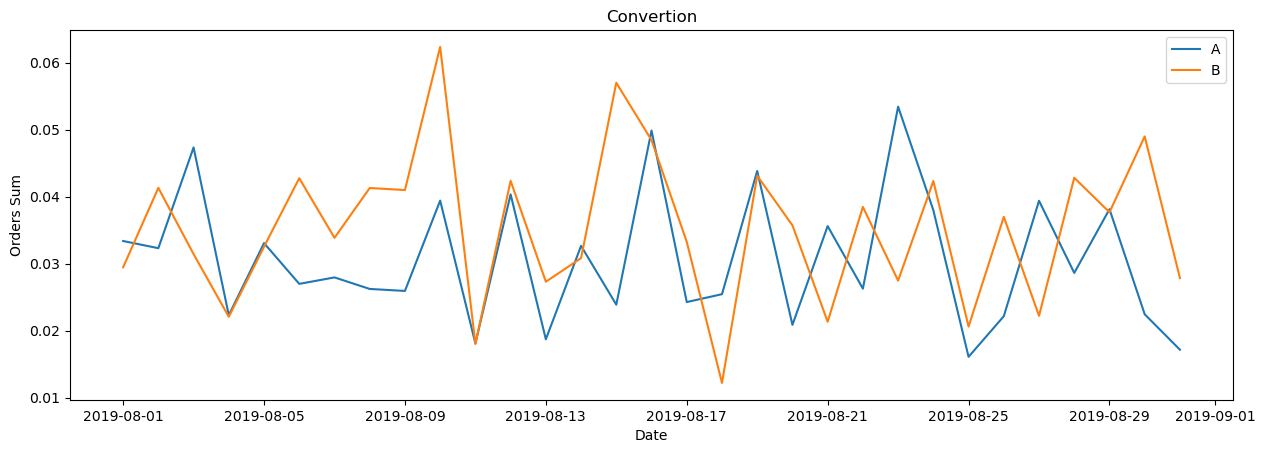

In [33]:
plt.figure().set_figwidth(15)
plt.ylabel('Orders Sum')
plt.xlabel('Date')
plt.title('Convertion')
plt.plot(convertion_A['date'], convertion_A['convertion'], label='A') 
plt.plot(convertion_B['date'], convertion_B['convertion'], label='B') 
plt.legend()
plt.show()

Jika tingkat konversi dibandingkan langsung, maka masih belum bisa disimpulkan apa-apa.

In [34]:
(convertion_B['convertion'] / convertion_A['convertion'] - 1).mean()

0.23143722025947888

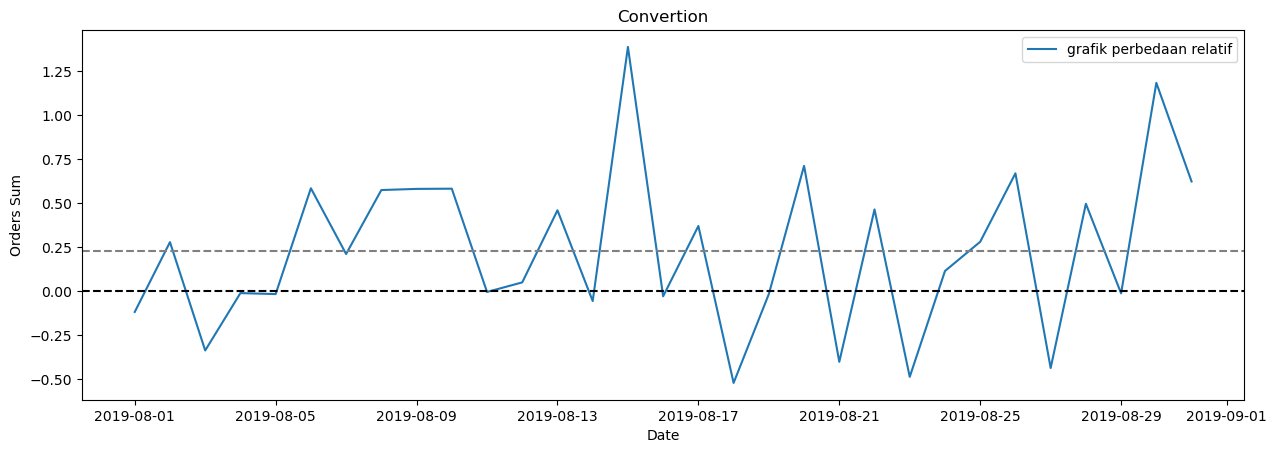

In [35]:
plt.figure().set_figwidth(15)
plt.ylabel('Orders Sum')
plt.xlabel('Date')
plt.title('Convertion')
plt.plot(convertion_B['date'], convertion_B['convertion'] / convertion_A['convertion'] - 1, label='grafik perbedaan relatif') 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.23, color='grey', linestyle='--')
plt.legend()
plt.show()

Grafik lebih banyak menunjukkan bahwa tingkat konversi grup B lebih banyak dibandingkan grup A, dengan rata-rata 23% lebih besar.

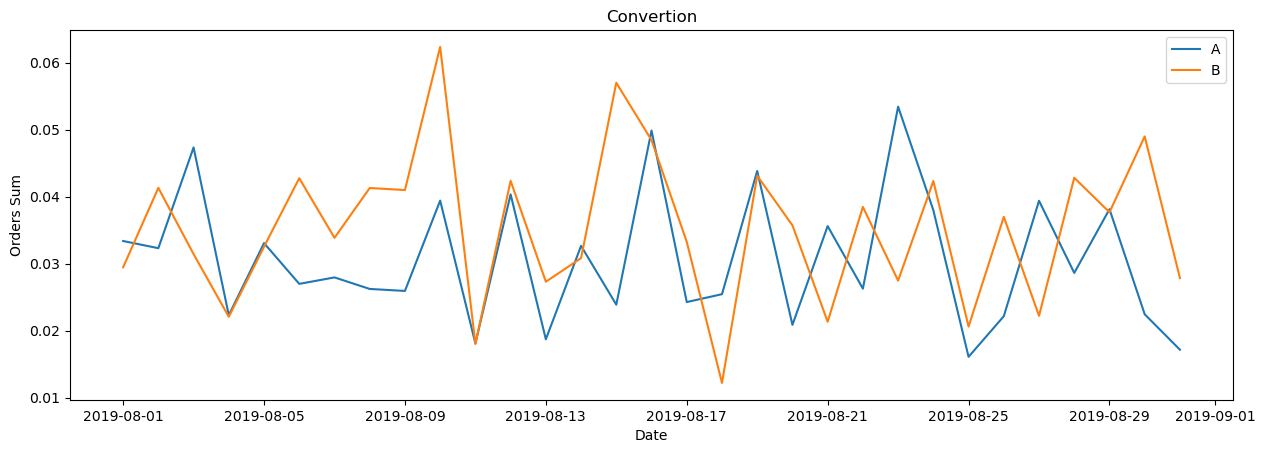

In [36]:
plt.figure().set_figwidth(15)
plt.ylabel('Orders Sum')
plt.xlabel('Date')
plt.title('Convertion')
plt.plot(convertion_A['date'], convertion_A['convertion'], label='A') 
plt.plot(convertion_B['date'], convertion_B['convertion'], label='B') 
plt.legend()
plt.show()

### Jumlah Pembelian Rata-Rata

In [37]:
order_revenue_A = orders_per_visitor_A.groupby('date', as_index=False)[['order_count','revenue']].sum()
visit_A = visits[visits['group'] == 'A'].groupby('date')['visits'].sum()

order_revenue_B = orders_per_visitor_B.groupby('date', as_index=False)[['order_count','revenue']].sum()
visit_B = visits[visits['group'] == 'B'].groupby('date')['visits'].sum()

In [38]:
average_order_A = order_revenue_A.merge(visit_A, on='date')
average_order_A['convertion'] = average_order_A['order_count'] / average_order_A['visits']
average_order_A.head()

,date,order_count,revenue,visits,convertion
0,2019-08-01,24,2356.8,719,0.033380
1,2019-08-02,20,1503.5,619,0.032310
2,2019-08-03,24,1815.2,507,0.047337
3,2019-08-04,16,1146.6,717,0.022315
4,2019-08-05,25,1988.1,756,0.033069


In [39]:

average_order_B = order_revenue_B.merge(visit_B, on='date')
average_order_B['convertion'] = average_order_B['order_count'] / average_order_B['visits']
average_order_B.head()

,date,order_count,revenue,visits,convertion
0,2019-08-01,21,1620.0,713,0.029453
1,2019-08-02,24,2623.8,581,0.041308
2,2019-08-03,16,1806.8,509,0.031434
3,2019-08-04,17,1717.3,770,0.022078
4,2019-08-05,23,1495.0,707,0.032532


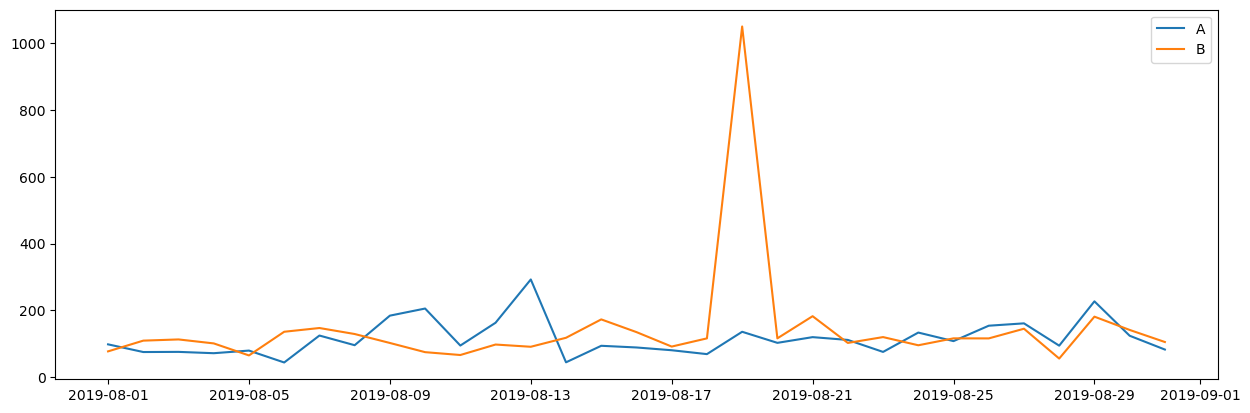

In [40]:
plt.figure().set_figwidth(15)
plt.plot(average_order_A ['date'], average_order_A ['revenue']/average_order_A ['order_count'], label='A')
plt.plot(average_order_B ['date'], average_order_B ['revenue']/average_order_B ['order_count'], label='B')
plt.legend()

Data pada grup A terlihat stabil, namun ternyata terdapat keanehan yang menyebabkan rata-rata penjualan grup B lebih banyak. yaitu antara tangga 17 Agustus hingga 21 Agustus 2017. Mari kita lihat.

In [41]:
average_order_B_anomaly = average_order_B[(average_order_B['date'] <= pd.to_datetime('2019-08-21')) & (average_order_B['date'] >= pd.to_datetime('2019-08-17'))]
average_order_B_anomaly

,date,order_count,revenue,visits,convertion
16,2019-08-17,14,1281.5,421,0.033254
17,2019-08-18,9,1044.9,737,0.012212
18,2019-08-19,21,22064.9,487,0.043121
19,2019-08-20,20,2324.6,560,0.035714
20,2019-08-21,14,2555.9,656,0.021341


Pad tanggal 19, terdapat 21 pesanan dengan total `revenue` lebih dari 22000 dolar pada tanggal 19 Agustus

Mari kita teliti lebih jauh

In [42]:
orders_per_visitor_B[orders_per_visitor_B['visitorId'] == 1920142716]

,visitorId,date,order_count,revenue
279,1920142716,2019-08-19,1,19920.4


hanya satu pelanggan dengan satu pesanan yang menyebabkan anomali, mari kita hapus

In [43]:
orders_per_visitor_B_filtered = orders_per_visitor_B[orders_per_visitor_B['visitorId'] != 1920142716]
orders_per_visitor_B_filtered

,visitorId,date,order_count,revenue
0,5114589,2019-08-16,1,10.8
1,6958315,2019-08-04,1,25.9
2,8300375,2019-08-01,1,165.7
3,39475350,2019-08-08,1,65.4
4,47206413,2019-08-10,1,15.2
...,...,...,...,...
623,4258103007,2019-08-22,1,95.5
624,4266935830,2019-08-29,1,1220.2
625,4279090005,2019-08-04,1,105.3
626,4281247801,2019-08-25,1,45.6


## Perbandingan dengan data filter

### Pendapatan

In [44]:
revenue_cumulative_A = orders[orders['group'] == 'A'].groupby('date').agg({'revenue' : 'sum'}).cumsum()
revenue_cumulative_B_filtered = orders_per_visitor_B_filtered.groupby('date').agg({'revenue' : 'sum'}).cumsum()

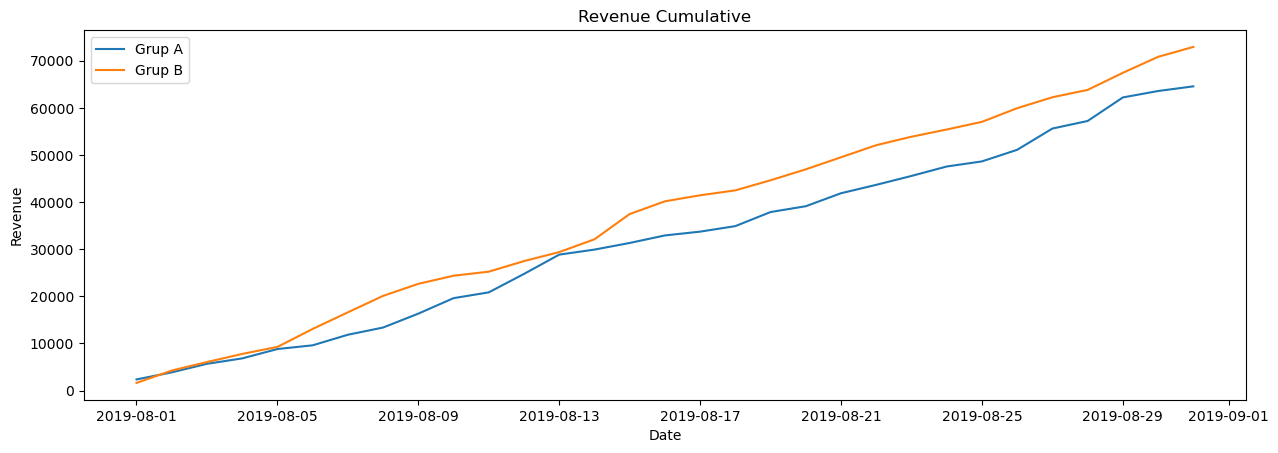

In [45]:
plt.figure().set_figwidth(15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Cumulative')
plt.plot(revenue_cumulative_A, label='Grup A')
plt.plot(revenue_cumulative_B_filtered, label='Grup B')
plt.legend()
plt.show()

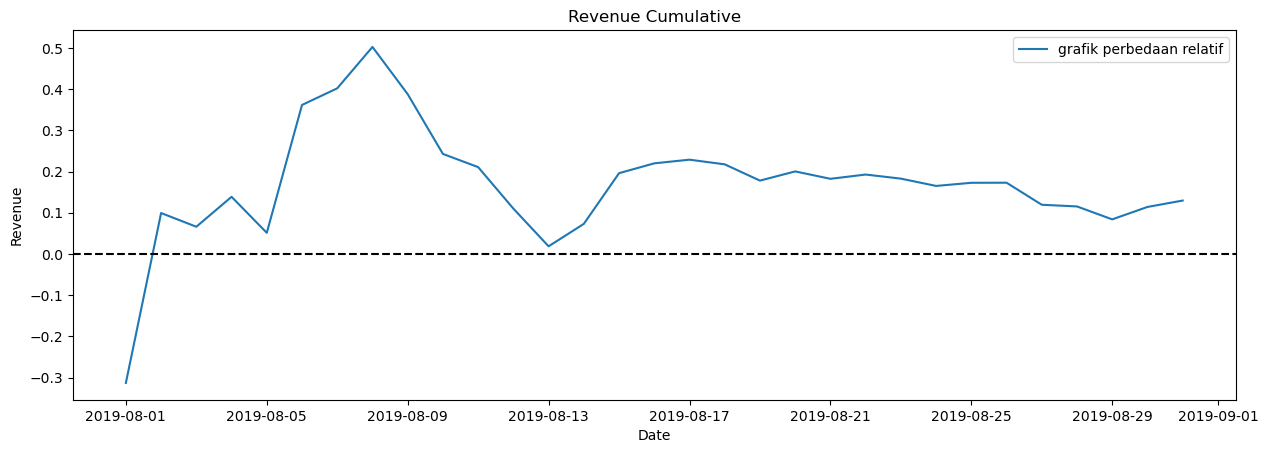

In [46]:
plt.figure().set_figwidth(15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Cumulative')
plt.plot(revenue_cumulative_B_filtered / revenue_cumulative_A - 1, label='grafik perbedaan relatif')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

pendapatan lebih stabil, namun grup B tetap memimpin

### Jumlah Pembelian Rata-rata

In [47]:
order_revenue_B_filtered = orders_per_visitor_B_filtered.groupby('date', as_index=False)[['order_count','revenue']].sum()
visit_B = visits[visits['group'] == 'B'].groupby('date')['visits'].sum()
average_order_B_filtered = order_revenue_B_filtered.merge(visit_B, on='date')
average_order_B_filtered['convertion'] = average_order_B_filtered['order_count'] / average_order_B_filtered['visits']

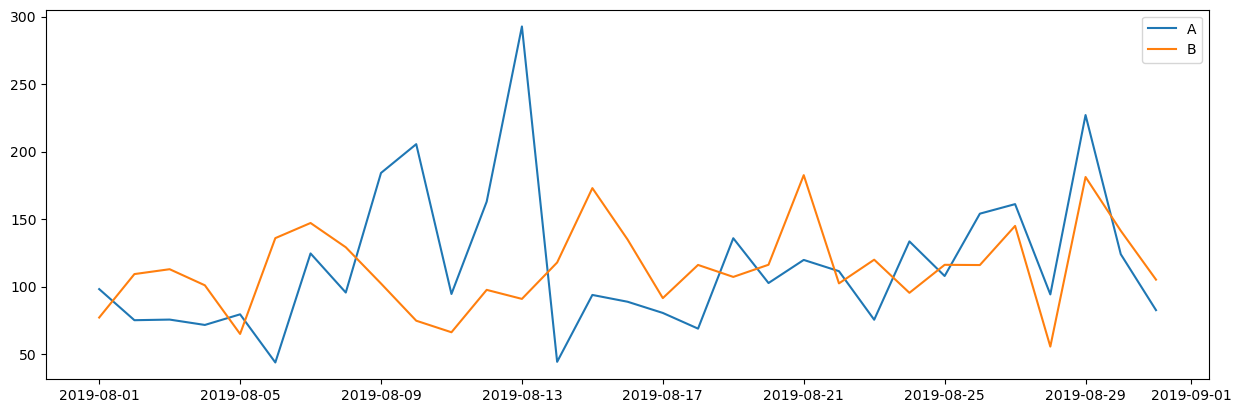

In [48]:
plt.figure().set_figwidth(15)
plt.plot(average_order_A ['date'], average_order_A ['revenue']/average_order_A ['order_count'], label='A')
plt.plot(average_order_B_filtered ['date'], average_order_B_filtered ['revenue']/average_order_B_filtered ['order_count'], label='B')
plt.legend()

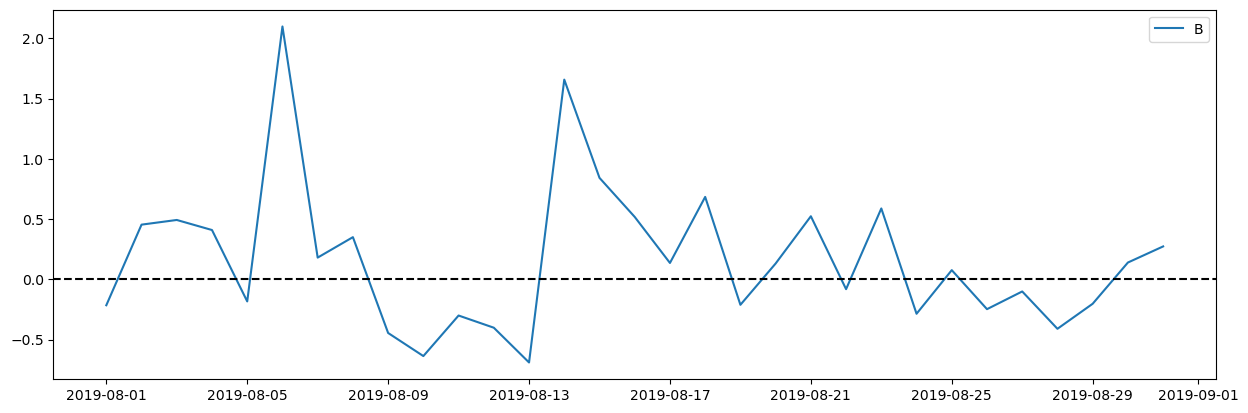

In [49]:
plt.figure().set_figwidth(15)
plt.plot(average_order_B_filtered ['date'], (average_order_B_filtered ['revenue']/average_order_B_filtered ['order_count']) / (average_order_A ['revenue']/average_order_A ['order_count']) -1 , label='B')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

Di akhir bulan grup B terlihat mulai melemah, namun tidak pasti.

## Statistika

### Konversi

In [50]:
alpha = .05# ketik kode programmu di sini

results = st.mannwhitneyu(convertion_A['convertion'], convertion_B['convertion'], True, 'less')# ketik kode programmu di sini

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value:  0.042936080165038866
Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan


Konversi grup B lebih besar dari grup A secara signifikansi statistik

### Penjualan rata-rata

In [51]:
alpha = .05# ketik kode programmu di sini

results = st.mannwhitneyu(average_order_A ['revenue']/average_order_A ['order_count'], average_order_B ['revenue']/average_order_B ['order_count'], True, 'less')# ketik kode programmu di sini

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value:  0.2111380543234191
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


Ternyata secara statistik, nilai penjualan rata-rata kedua grup belum terlihat perbeedaannya.

### Penjualan

In [52]:
alpha = .05# ketik kode programmu di sini

results = st.mannwhitneyu(revenue_cumulative_A['revenue'], revenue_cumulative_B['revenue'], True, 'less')# ketik kode programmu di sini

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value:  0.05425159152700354
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


Ternyata secara statistik, nilai penjualan kedua grup juga belum terlihat perbeedaannya.

### Penjualan rata-rata difilter

In [53]:
alpha = .05# ketik kode programmu di sini

results = st.mannwhitneyu(average_order_A ['revenue']/average_order_A ['order_count'], average_order_B_filtered ['revenue']/average_order_B_filtered ['order_count'], True, 'less')# ketik kode programmu di sini

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value:  0.27246371239993106
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


Ternyata secara statistik, nilai penjualan rata-rata kedua grup belum terlihat perbeedaannya, yang difilter maupun yang mentah.

### Penjualan difilter

In [54]:
alpha = .05# ketik kode programmu di sini

results = st.mannwhitneyu(revenue_cumulative_A['revenue'], revenue_cumulative_B_filtered['revenue'], True, 'less')# ketik kode programmu di sini

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangat signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value:  0.1727728327891377
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


## Simpulan

1. Sebelum melakukan testing A/B, dicari prioritas hipotesis terbaik menggunakan framework RICE, dimana parameter Reach sangat mempengaruhi hasil prioritas. Sebesar apapun Impact dari hipotesis, jika pengguna yang terkena dampak tersebut sedikit, maka akan sia-sia.
2. Ketika A/B testing, sebelum difilter maupun setelah difilter, nilai penjualan, penjualan rata-rata, maupun Konversi, sekilas terlihat grup B lebih menguntungkan daripada grup A.
3. Secara signifikansi statistik, ternyata tidak ada perbedaan antara grup A maupun grup B, yang menandakan bahwa belum terdapat keuntungan yang signifian dari grup B, walaupun secara grafik sudah mennguntungkan.
4. Maka dari itu kesimpulan yang diambil dari A/B testing adalah belum dapat menyimpulkan diawal, sepertinya penelitian harus dilanjutkan mengingat secara grafik sudah terdapat tanda bahwa grup B sudah mulai memimpin, sehingga memiliki harapan  grup B bisa menguntungkan.